# Wine Quality Project

## Understanding Business Objectives
### Data Mining Objectives 
#### 1. Clean data and delete outliers
#### 2. Find which variables corrleate closest to quality
#### 3. Create a model that can predict quality by said variables

## Data Understanding

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

df_wine = pd.read_excel(r'C:\Users\brenden.noblitt\Desktop\wine.xlsx')
df_wine.head(3)

,data_number,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_index
0,1270,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.9900,3.50,0.82,10.2,8,1
1,589,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.9900,3.31,0.74,10.2,8,1
2,456,11.3,0.62,0.67,2.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8,1


In [5]:
df_wine.info()
# No missing values and all data is in the right format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data_number           1599 non-null   int64  
 1   fixed_acidity         1599 non-null   float64
 2   volatile_acidity      1599 non-null   float64
 3   citric_acid           1599 non-null   float64
 4   residual_sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free_sulfur_dioxide   1599 non-null   float64
 7   total_sulfur_dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
 13  quality_index         1599 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 175.0 KB


In [6]:
df_wine.describe()
# All datapoints will need to delete outliers

,data_number,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_index
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.154534,0.520547,0.270513,2.181801,0.078710,15.163852,42.825516,0.996243,3.308774,0.636048,10.392798,5.636023,0.135710
std,461.735855,1.490883,0.165588,0.193945,0.426845,0.015505,9.140986,26.757870,0.002150,0.141596,0.119098,1.017398,0.807569,0.342587
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.038000,1.000000,6.000000,0.990000,2.920000,0.330000,8.400000,3.000000,0.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995380,3.210000,0.550000,9.500000,5.000000,0.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.078000,14.000000,38.000000,0.996550,3.310000,0.620000,10.200000,6.000000,0.000000
75%,1199.500000,9.000000,0.630000,0.420000,2.400000,0.087000,21.000000,58.000000,0.997600,3.400000,0.710000,11.000000,6.000000,0.000000
max,1599.000000,12.300000,1.010000,0.790000,3.650000,0.124000,42.000000,122.000000,1.000000,3.690000,1.000000,13.500000,8.000000,1.000000


In [7]:
df_wine.shape

(1599, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002267399B088>]],
      dtype=object)

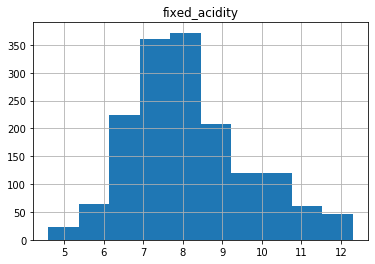

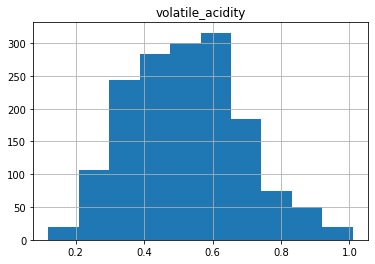

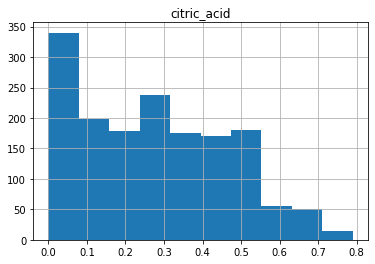

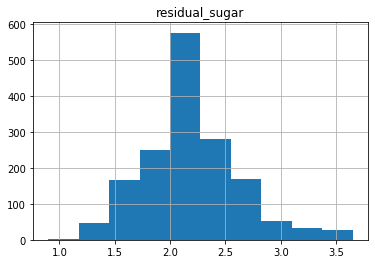

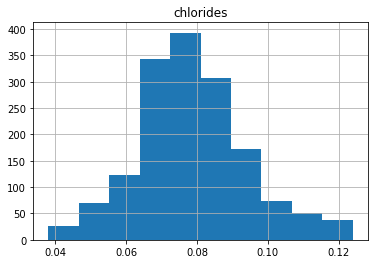

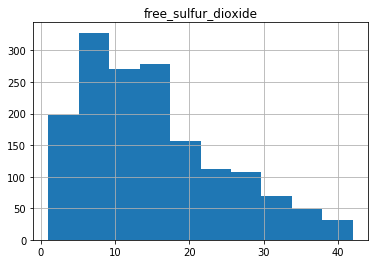

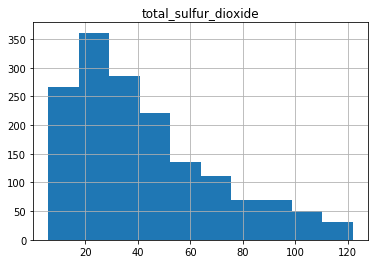

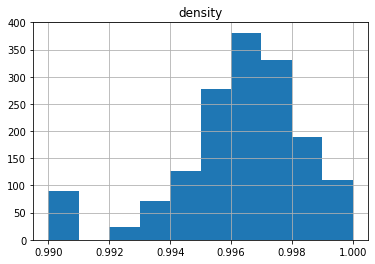

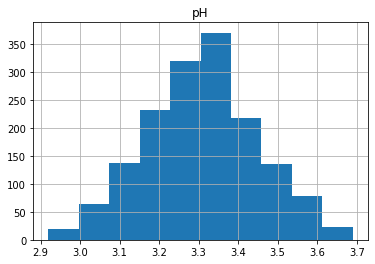

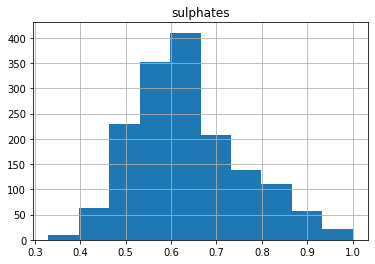

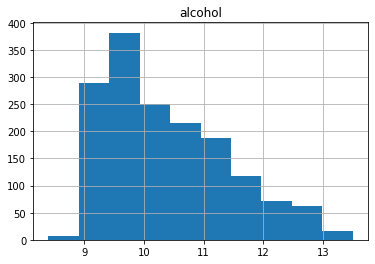

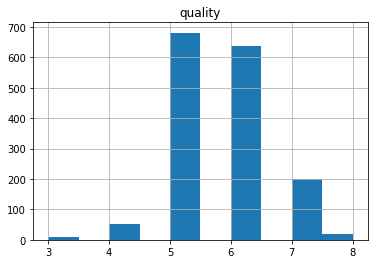

In [8]:
df_wine.hist(column='fixed_acidity')
df_wine.hist(column='volatile_acidity')
df_wine.hist(column='citric_acid')
df_wine.hist(column='residual_sugar')
df_wine.hist(column='chlorides')
df_wine.hist(column='free_sulfur_dioxide')
df_wine.hist(column='total_sulfur_dioxide')
df_wine.hist(column='density')
df_wine.hist(column='pH')
df_wine.hist(column='sulphates')
df_wine.hist(column='alcohol')
df_wine.hist(column='quality')

### Initial Data Collection Report
#### All data is in the right type and there are no null values, however, there is a lot of distance between the mean and max, suggesting that there are outliers. Further exploration into outliers will be required. The most important variable in the dataset is "quality" because this variable will be used to measure customer satisfaction, as well as set the base for modeling. 

### Data Description Report
#### Data descriptions can be found in the .info cell. All data is in the correct format and there are no null values.

## Data Preparation 

### Data Cleaning

In [9]:
Q1 = df_wine.quantile(0.25)
Q3 = df_wine.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR 
upper_limit = Q3 + 1.5*IQR

print(IQR)

#Establishing IQR for each column 

data_number             799.00000
fixed_acidity             1.90000
volatile_acidity          0.24000
citric_acid               0.33000
residual_sugar            0.50000
chlorides                 0.01700
free_sulfur_dioxide      14.00000
total_sulfur_dioxide     36.00000
density                   0.00222
pH                        0.19000
sulphates                 0.16000
alcohol                   1.50000
quality                   1.00000
quality_index             0.00000
dtype: float64


In [10]:
lower_limit,upper_limit

#Finding upper and lower limit to clean in Excel

(data_number            -798.00000
 fixed_acidity             4.25000
 volatile_acidity          0.03000
 citric_acid              -0.40500
 residual_sugar            1.15000
 chlorides                 0.04450
 free_sulfur_dioxide     -14.00000
 total_sulfur_dioxide    -32.00000
 density                   0.99205
 pH                        2.92500
 sulphates                 0.31000
 alcohol                   7.25000
 quality                   3.50000
 quality_index             0.00000
 dtype: float64,
 data_number             2398.00000
 fixed_acidity             11.85000
 volatile_acidity           0.99000
 citric_acid                0.91500
 residual_sugar             3.15000
 chlorides                  0.11250
 free_sulfur_dioxide       42.00000
 total_sulfur_dioxide     112.00000
 density                    1.00093
 pH                         3.68500
 sulphates                  0.95000
 alcohol                   13.25000
 quality                    7.50000
 quality_index           

In [11]:
df_wine.describe()

# Outliers cleaned in Excel

,data_number,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_index
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.154534,0.520547,0.270513,2.181801,0.078710,15.163852,42.825516,0.996243,3.308774,0.636048,10.392798,5.636023,0.135710
std,461.735855,1.490883,0.165588,0.193945,0.426845,0.015505,9.140986,26.757870,0.002150,0.141596,0.119098,1.017398,0.807569,0.342587
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.038000,1.000000,6.000000,0.990000,2.920000,0.330000,8.400000,3.000000,0.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995380,3.210000,0.550000,9.500000,5.000000,0.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.078000,14.000000,38.000000,0.996550,3.310000,0.620000,10.200000,6.000000,0.000000
75%,1199.500000,9.000000,0.630000,0.420000,2.400000,0.087000,21.000000,58.000000,0.997600,3.400000,0.710000,11.000000,6.000000,0.000000
max,1599.000000,12.300000,1.010000,0.790000,3.650000,0.124000,42.000000,122.000000,1.000000,3.690000,1.000000,13.500000,8.000000,1.000000


### Construct Data

In [12]:
df_wine['quality'].value_counts(ascending=False)

# Setting quality index 

# 1-3 = Bad 
# 4-6 = Okay
# 7-9 = Great
# 10 = Perfect(Theoretical)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

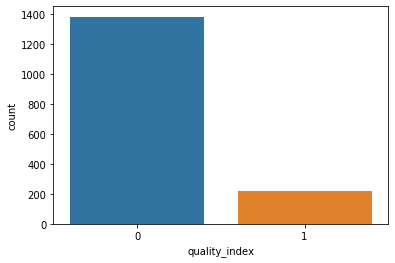

In [13]:
sns.countplot(df_wine['quality_index'])

# Quality index created in Excel using above criteria

In [14]:
df_wine.corr()

# Alcohol and sulphates have highest correlation to quality
# Quality index and fixed acidity have high correlation

,data_number,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_index
data_number,1.000000,-0.236731,0.006426,-0.150878,-0.143013,-0.185546,0.077889,-0.091537,-0.204198,0.138473,-0.058784,0.251208,0.066453,0.027225
fixed_acidity,-0.236731,1.000000,-0.258476,0.608682,0.225436,0.217579,-0.145813,-0.113789,0.289083,-0.595286,0.175426,-0.048917,0.109637,0.109124
volatile_acidity,0.006426,-0.258476,1.000000,-0.564257,0.018550,0.135295,0.004853,0.090253,0.054035,0.220002,-0.314998,-0.214283,-0.356247,-0.275326
citric_acid,-0.150878,0.608682,-0.564257,1.000000,0.156708,0.076555,-0.060658,-0.010996,0.090736,-0.534443,0.280341,0.129530,0.232209,0.216609
residual_sugar,-0.143013,0.225436,0.018550,0.156708,1.000000,0.244116,0.040756,0.126300,0.147112,-0.056554,0.066669,0.082817,0.035506,0.034873
chlorides,-0.185546,0.217579,0.135295,0.076555,0.244116,1.000000,0.000860,0.076224,0.213287,-0.160174,-0.055834,-0.215150,-0.145858,-0.124425
free_sulfur_dioxide,0.077889,-0.145813,0.004853,-0.060658,0.040756,0.000860,1.000000,0.596640,-0.039425,0.081609,0.027816,-0.074064,-0.047187,-0.079443
total_sulfur_dioxide,-0.091537,-0.113789,0.090253,-0.010996,0.126300,0.076224,0.596640,1.000000,0.023851,0.001375,-0.030985,-0.234335,-0.168010,-0.151081
density,-0.204198,0.289083,0.054035,0.090736,0.147112,0.213287,-0.039425,0.023851,1.000000,-0.081321,0.011986,-0.355096,-0.149708,-0.133039
pH,0.138473,-0.595286,0.220002,-0.534443,-0.056554,-0.160174,0.081609,0.001375,-0.081321,1.000000,-0.018103,0.128312,-0.074391,-0.077195


### Data Cleaning Report
#### IQR Outlier method used to clean outliers out. IQR function created with an upper and lower limit, and use to hand delete and replace with the column mean. This is done to create equal distribution since there are not enough records to warrent equal distributio without replacing with the mean. "quality_index" column also created on the basis of the above criteria to be used in ML models.

## Modeling

### Select Modeling Technique
#### Since determining variables that influence the quality index is a classification/prediction problem, the technique that is most widely used in this situation is a linear regression model. 

### Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
x = df_wine[['alcohol', 'sulphates', 'citric_acid']]
y = df_wine['quality']

# Top 3 most correlated variables fall into x 
# y will be the dependent variable as 'quality'

In [17]:
x.shape

(1599, 3)

In [18]:
y.shape

(1599,)

In [19]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

# Kept for single linear regression use

(4797, 1)

In [20]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
reg.score(x,y)

# Slightly above normal

0.31152191945168783

In [22]:
reg.coef_

# Through the coefficient score, sulphates have the highest relationship in regards to quality

array([0.31150414, 1.84652679, 0.43734824])

In [23]:
reg.intercept_

1.105835885670059

In [24]:
reg.predict(x)

array([5.81045057, 5.75457156, 6.84711823, ..., 5.16488323, 5.2505433 ,
       5.10008321])

In [25]:
df_wine['predicted_quality'] = reg.predict(x)
df_wine.head(3)

,data_number,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_index,predicted_quality
0,1270,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.9900,3.50,0.82,10.2,8,1,5.810451
1,589,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.9900,3.31,0.74,10.2,8,1,5.754572
2,456,11.3,0.62,0.67,2.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8,1,6.847118


### Model Evaluation 

### Linear Regression Evaluation 

In [26]:
df_wine['predicted_quality'].describe()

count    1599.000000
mean        5.636023
std         0.450738
min         4.562998
25%         5.263631
50%         5.561071
75%         5.966282
max         7.365552
Name: predicted_quality, dtype: float64

In [27]:
from sklearn.feature_selection import f_regression 

f_regression(x,y)
p_values = f_regression(x,y)[1]
p_values

array([3.10932481e-86, 8.31190718e-58, 5.10256271e-21])

In [28]:
df_wine.to_excel(r'C:\Users\brenden.noblitt\Desktop\wineCLEAN.xlsx', index = False)